In [21]:
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
#FACE

In [23]:
faceArray = imread("low-rank_data/face.jpg", as_grey=True)

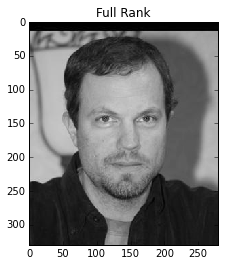

In [57]:
a = plt.figure()
a = a.add_subplot("111")
imshow(faceArray,cmap='gray')
a.set_title("Full Rank")


In [25]:
u, s, v = np.linalg.svd(faceArray, full_matrices=False)
s = np.diag(s)
print(v.shape)
# s = np.vstack((s, np.zeros((50, 280))))

(280, 280)


In [26]:
def generateRanked(u,s,v,k):
    s2 = np.copy(s)
    for i in range(s.shape[0]):
        if i >= k:
            s2[i][i] = 0
    return u.dot(s2.dot(v))

/Users/akilesh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


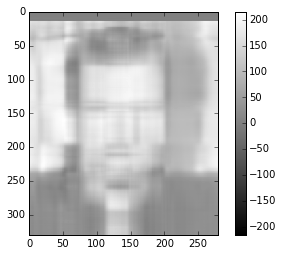

In [27]:
imshow(generateRanked(u,s,v,5),cmap='gray')

/Users/akilesh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


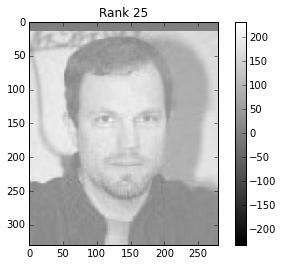

In [64]:
a = plt.figure()
a = a.add_subplot("111")
imshow(generateRanked(u,s,v,25),cmap='gray')
a.set_title("Rank 25")


/Users/akilesh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


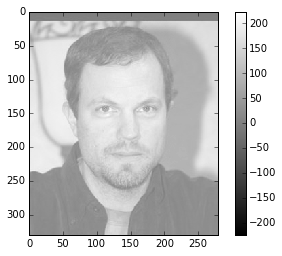

In [29]:
imshow(generateRanked(u,s,v,100),cmap='gray')

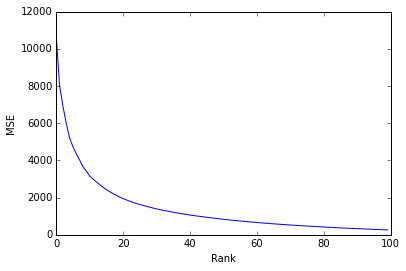

In [30]:
norms = []
for i in range(100):
    norms.append(np.linalg.norm(generateRanked(u,s,v,i + 1) - u.dot(s).dot(v)))
plt.figure()
plt.ylabel('MSE')
plt.xlabel('Rank')
plt.plot(range(100),norms)


In [31]:
#SKY

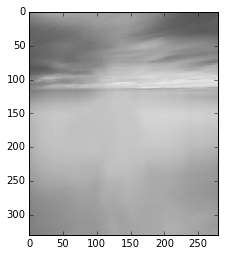

In [32]:
skyArray = imread("low-rank_data/sky.jpg", as_grey=True)
imshow(skyArray)

In [33]:
u2, s2, v2 = np.linalg.svd(skyArray, full_matrices=False)
s2 = np.diag(s2)

/Users/akilesh/anaconda3/lib/python3.4/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warnings.warn("Float image out of standard range; displaying "


/Users/akilesh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


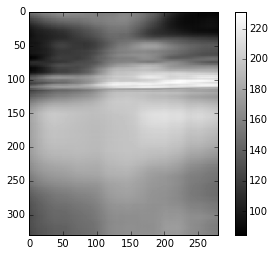

In [34]:
imshow(generateRanked(u2,s2,v2,5),cmap='gray')

/Users/akilesh/anaconda3/lib/python3.4/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warnings.warn("Float image out of standard range; displaying "


/Users/akilesh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


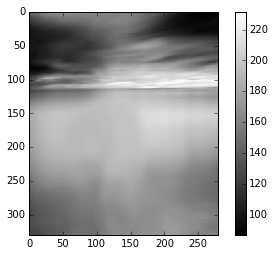

In [35]:
imshow(generateRanked(u2,s2,v2,20),cmap='gray')

/Users/akilesh/anaconda3/lib/python3.4/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warnings.warn("Float image out of standard range; displaying "


/Users/akilesh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


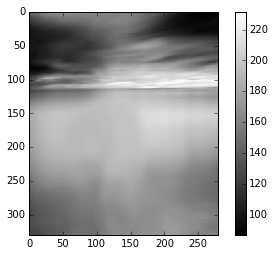

In [36]:
imshow(generateRanked(u2,s2,v2,20),cmap='gray')

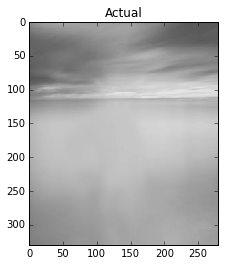

In [45]:
#TRY TO DIFF
a = plt.figure()
a = a.add_subplot("111")
imshow(skyArray,cmap='gray')
a.set_title("Actual")


/Users/akilesh/anaconda3/lib/python3.4/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warnings.warn("Float image out of standard range; displaying "


/Users/akilesh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


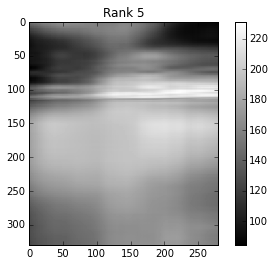

In [55]:
a = plt.figure()
a = a.add_subplot("111")
imshow(generateRanked(u2,s2,v2,5),cmap='gray')
a.set_title("Rank 5")

Sky Image: k = 5
Face Image: k = 20
It looks like this is because the sky image is smaller to start with and it generally looks like the picture gets more and more blurred as dimensions increase.